### Census Income Dataset - Classification

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import os, sys

In [2]:
header = ['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status', 'occupation', 'relationship',
         'race', 'sex', 'capital-gain', 'capital-loss','hours-per-week', 'native-country', 'salary' ]

In [3]:
df = pd.read_csv(r"adult.csv", names = header)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
def detail_info():
    temp_df = pd.DataFrame(index= df.columns)
    
    temp_df['data_type'] = df.dtypes
    temp_df['duplicates'] = df.duplicated().sum()   
    temp_df['unique_val'] = df.nunique()
    temp_df['missing_val'] = df.isnull().sum()
    temp_df['missing_val_%'] = round(df.isnull().mean()*100,2)
    
    return temp_df

In [6]:
detail_info()

,data_type,duplicates,unique_val,missing_val,missing_val_%
age,int64,24,73,0,0.0
workclass,object,24,9,0,0.0
fnlwgt,int64,24,21648,0,0.0
education,object,24,16,0,0.0
education-num,int64,24,16,0,0.0
marital-status,object,24,7,0,0.0
occupation,object,24,15,0,0.0
relationship,object,24,6,0,0.0
race,object,24,5,0,0.0
sex,object,24,2,0,0.0


In [7]:
df['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64


### Observation
* Output feature Salary has two classses means this is a binary classification
* There is no missing values
*  There are 24 duplicate values

In [8]:
df.drop_duplicates(keep ='first', inplace=True)
df.reset_index(drop=True)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32533,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32534,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32535,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
detail_info()

,data_type,duplicates,unique_val,missing_val,missing_val_%
age,int64,0,73,0,0.0
workclass,object,0,9,0,0.0
fnlwgt,int64,0,21648,0,0.0
education,object,0,16,0,0.0
education-num,int64,0,16,0,0.0
marital-status,object,0,7,0,0.0
occupation,object,0,15,0,0.0
relationship,object,0,6,0,0.0
race,object,0,5,0,0.0
sex,object,0,2,0,0.0


In [10]:
categorical_cols = [x for x in df.columns if df[x].dtypes=='O']
categorical_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'salary']

In [11]:
for feature in categorical_cols:
    print(feature ,df[feature].unique(), sep='\n')
    print('\n')
  

workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']


sex
[' Male' ' Female']


native-country
[' United-States' ' Cuba' ' Jamai

### Observations:
. There are ' ?' in  columns - workclass, occupation and native-country.

. There is a white space as prefix in each observation

In [12]:
# Lets see how many ' ?' are there in which features

for feature in categorical_cols:
    for x in df[feature].unique():
        if x== ' ?':
            print(feature, df[df[feature]==' ?'].shape[0])

workclass 1836
occupation 1843
native-country 582


In [13]:
df['workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [14]:
for i in ['workclass', 'occupation', 'native-country']:
    df.drop(df[df[i]==" ?"].index, inplace=True)
df.reset_index(drop=True)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30135,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30136,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30137,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [15]:
# Removing white spaces

for i in categorical_cols:
    df[i] = df[i].str.strip()

In [16]:
# Reviewing ' ?' and white spaces are removed or not

for i in categorical_cols:
    print(i, df[i].unique(), sep='\n')

workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']
education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']
marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex
['Male' 'Female']
native-country
['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Pol

In [17]:
# lets see now numerical columns

numerical_cols = [x for x in df.columns if df[x].dtypes != 'O']
numerical_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [18]:
for i in numerical_cols:
    if i != 'fnlwgt':
        print(i, len(df[i].unique()), np.sort(df[i].unique()), sep='\n')
        print('\n')

age
72
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 88 90]


education-num
16
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


capital-gain
118
[    0   114   401   594   914   991  1055  1086  1151  1173  1409  1424
  1455  1471  1506  1639  1797  1831  1848  2009  2036  2050  2062  2105
  2174  2176  2202  2228  2290  2329  2346  2354  2387  2407  2414  2463
  2538  2580  2597  2635  2653  2829  2885  2907  2936  2961  2964  2977
  2993  3103  3137  3273  3325  3411  3418  3432  3456  3464  3471  3674
  3781  3818  3887  3908  3942  4064  4101  4386  4416  4508  4650  4687
  4787  4865  4931  4934  5013  5060  5178  5455  5556  5721  6097  6360
  6418  6497  6514  6723  6767  6849  7298  7430  7443  7688  7896  7978
  8614  9386  9562 10520 10566 10605 11678 13550 14084 14344 15020 15024
 15831 18481 20051 22040 251

In [19]:
def capital_range(df, col_name):
    quater_num = round(df[col_name].max()/4)    
    bins = [-1,1, quater_num, 2*quater_num, 3*quater_num, 4*quater_num]
    group = [0,1,2,3,4]

    return pd.cut(df[col_name], bins, labels=group)

In [20]:
df['capital-gain'] = capital_range(df,'capital-gain')

In [21]:
df['capital-gain'].unique()

[1, 0, 2, 4]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [22]:
df['capital-loss'] = capital_range(df,'capital-loss')

<AxesSubplot:xlabel='salary', ylabel='count'>

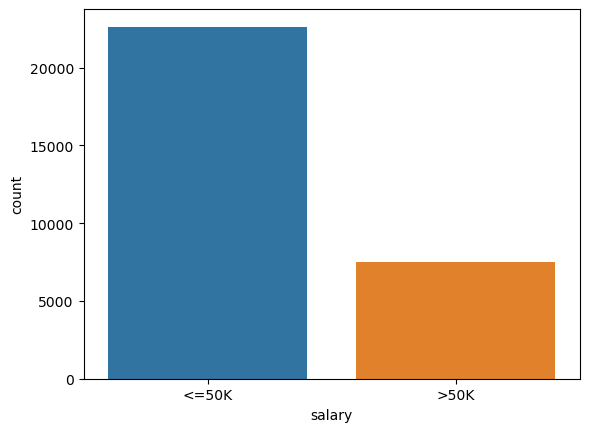

In [23]:
sns.countplot(df['salary'], data= df)

In [24]:
df['salary'].value_counts()

<=50K    22633
>50K      7506
Name: salary, dtype: int64

In [25]:
round(df['salary'].value_counts(all)*100,2)

<=50K    75.1
>50K     24.9
Name: salary, dtype: float64

### Observation:

* Person earning >50k is 1/3rd of <=50k

In [26]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [27]:
np.sort(df['age'].unique())

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 88, 90], dtype=int64)

In [28]:
# Lets bucktize the age feature:

def age_group(x):
    if (x<=20):
        return '0-20'
    elif x<=30:
        return '20-30'
    elif x<=40:
        return '30-40'
    elif x<=50:
        return '40-50'
    elif x<=60:
        return '50-60'
    elif x<=70:
        return '60-70'
    else:
        return '70-90'    


In [29]:
df['age_group'] = df['age'].apply(age_group)

In [30]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,age_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,40,United-States,<=50K,30-40
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,40-50
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,30-40
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,50-60
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,20-30


<AxesSubplot:xlabel='age_group', ylabel='count'>

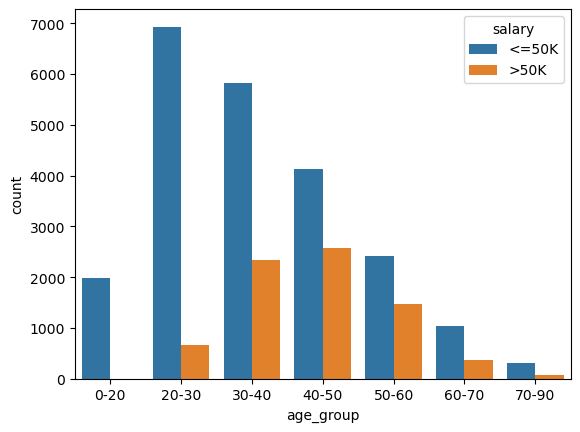

In [31]:
sns.countplot(df['age_group'], hue =df['salary'], order= np.sort(df['age_group'].unique()))

In [32]:
list(df['workclass'].value_counts().keys())

['Private',
 'Self-emp-not-inc',
 'Local-gov',
 'State-gov',
 'Self-emp-inc',
 'Federal-gov',
 'Without-pay']

### Observation:

. Majority of the people earning more than 50k is between age 30 to 60 years.

<AxesSubplot:xlabel='workclass', ylabel='count'>

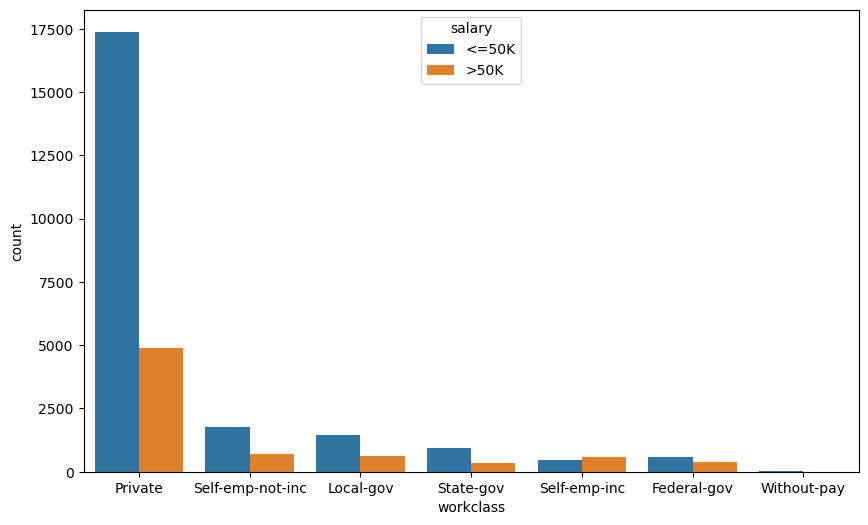

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(df['workclass'], hue =df['salary'], order= (list(df['workclass'].value_counts().keys())))

### Observation:
. Majority of the people working in private sector.

. Private sector employees are earning >50k are more compare to rest of the sectors.

<AxesSubplot:xlabel='education', ylabel='count'>

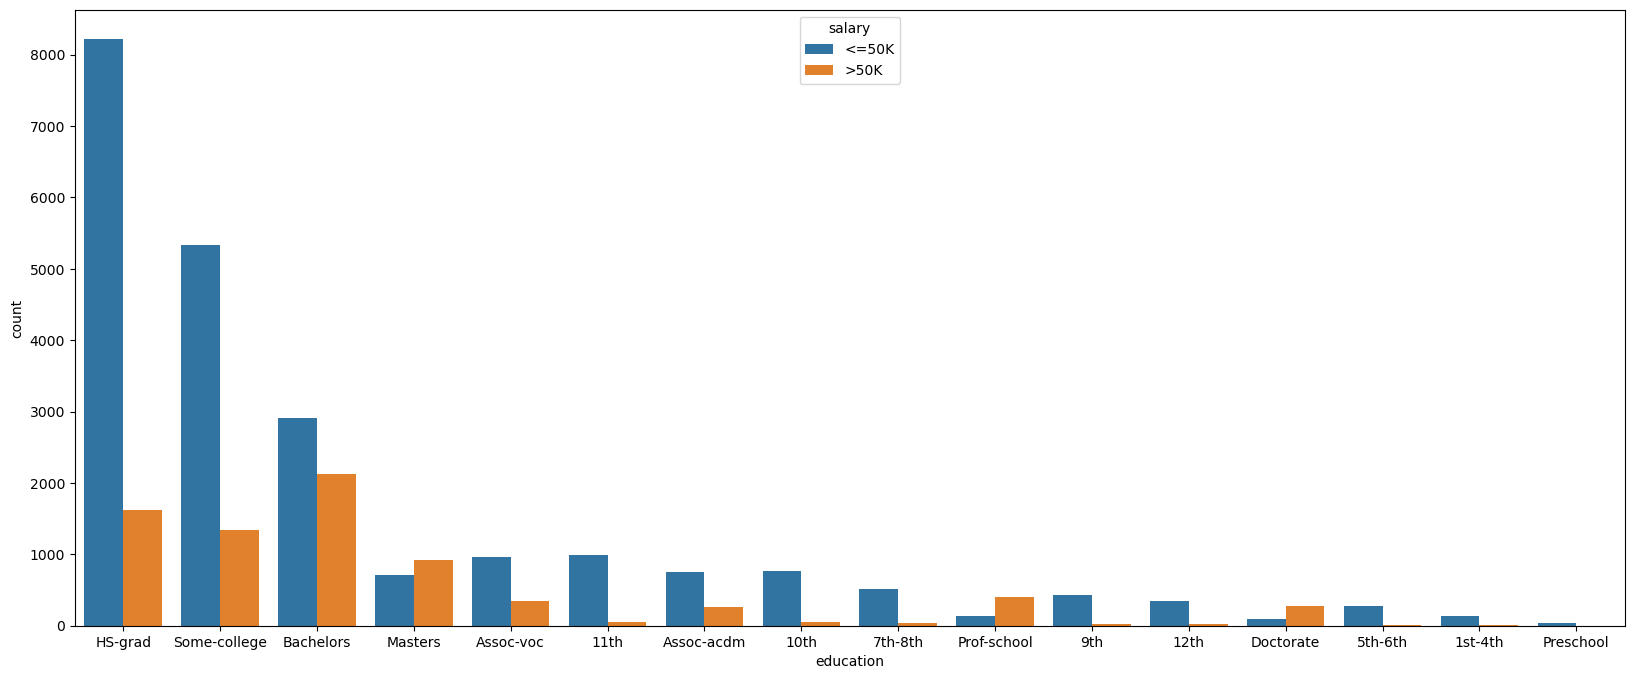

In [34]:
plt.figure(figsize=(20,8))
sns.countplot(df['education'], hue =df['salary'], order= (list(df['education'].value_counts().keys())))

In [35]:
df['education'].value_counts()

HS-grad         9834
Some-college    6669
Bachelors       5042
Masters         1626
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          556
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          287
1st-4th          149
Preschool         44
Name: education, dtype: int64

In [36]:
df['education'].replace(['11th', '10th', '7th-8th', '9th', '12th', '5th-6th', '10th', '1st-4th', 'Preschool'],'School', inplace = True)
df['education'].value_counts()

HS-grad         9834
Some-college    6669
Bachelors       5042
School          3736
Masters         1626
Assoc-voc       1307
Assoc-acdm      1008
Prof-school      542
Doctorate        375
Name: education, dtype: int64

### Observation:
. People who have studied upto 12th class are very few to earn more than 50k.

. Most of the people are Bechlors, HS-grad, Some-college, Masters.

. Few of the Assoc-voc and Assoc-acdm are able to earn >50k.

<AxesSubplot:xlabel='marital-status', ylabel='count'>

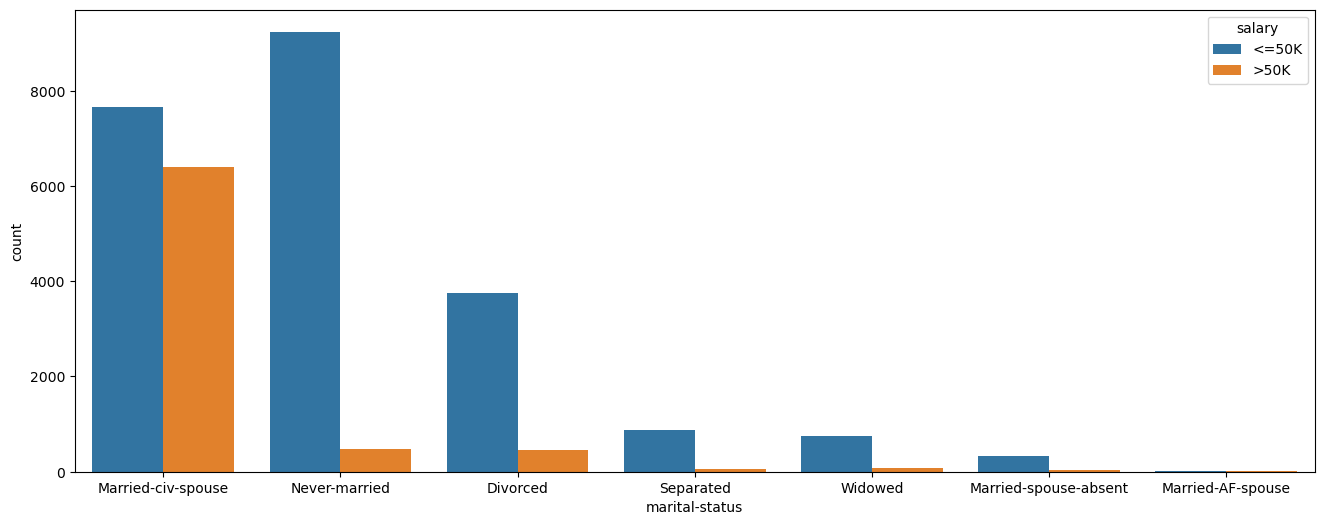

In [37]:
plt.figure(figsize=(16,6))
sns.countplot(df['marital-status'], hue =df['salary'], order= (list(df['marital-status'].value_counts().keys())))

### Observation:

. 'Married-civ-spouse' is only category in marital status who has comparable numbers of people earning >50k.

. Never-married & Divorced are second and thrird largest categories however way lesser than leading category - 'Married-civ-spouse'.

<AxesSubplot:xlabel='occupation', ylabel='count'>

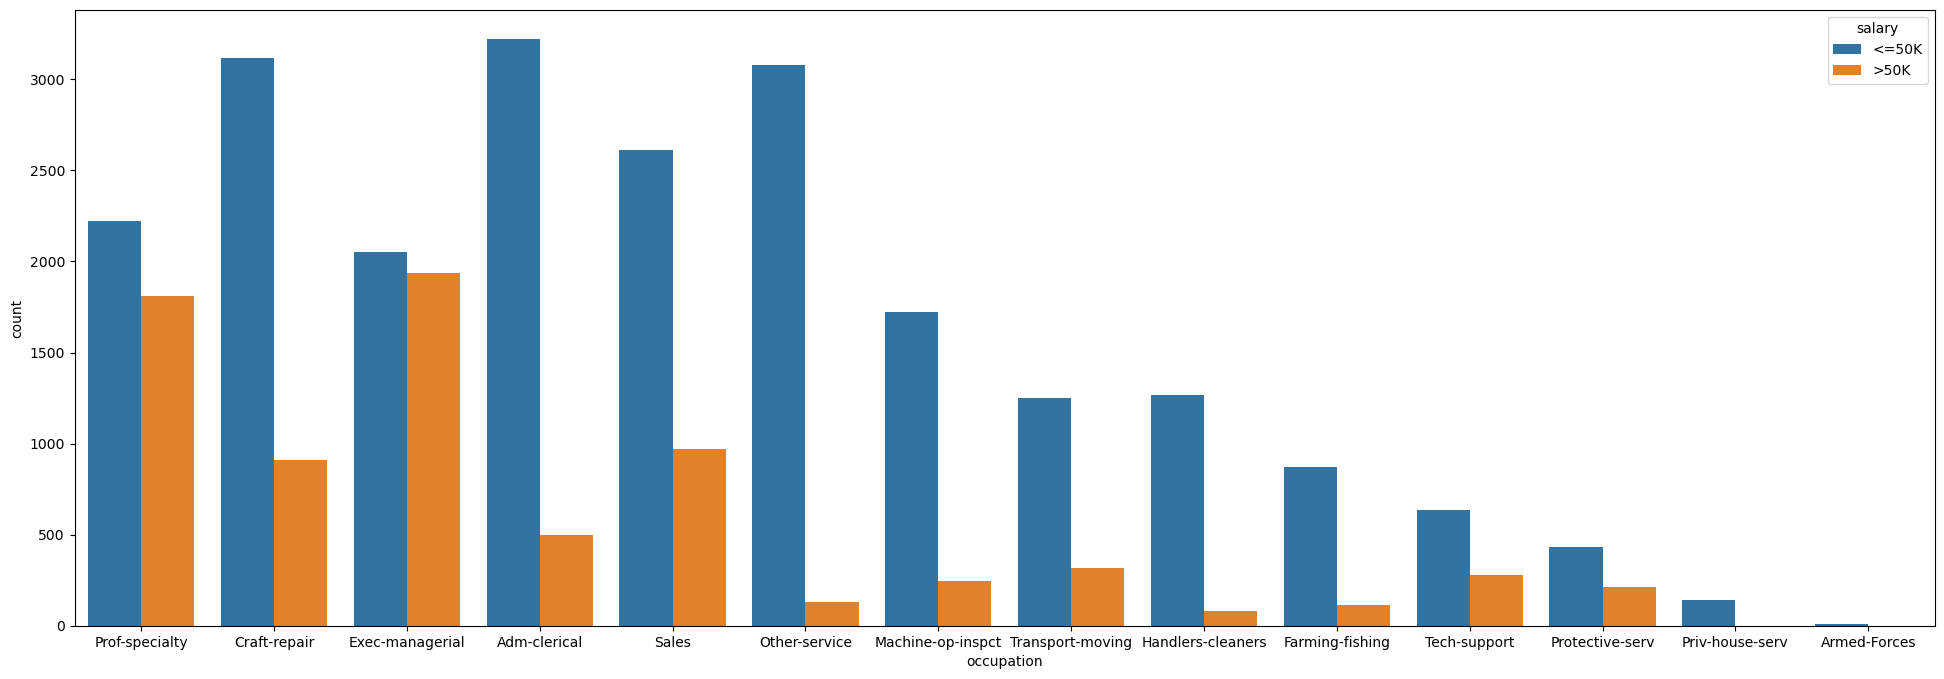

In [38]:
plt.figure(figsize=(24,8))
sns.countplot(df['occupation'], hue =df['salary'], order= (list(df['occupation'].value_counts().keys())))

In [39]:
df['occupation'].value_counts()

Prof-specialty       4034
Craft-repair         4025
Exec-managerial      3991
Adm-clerical         3719
Sales                3584
Other-service        3209
Machine-op-inspct    1964
Transport-moving     1572
Handlers-cleaners    1349
Farming-fishing       987
Tech-support          911
Protective-serv       644
Priv-house-serv       141
Armed-Forces            9
Name: occupation, dtype: int64

<AxesSubplot:xlabel='relationship', ylabel='count'>

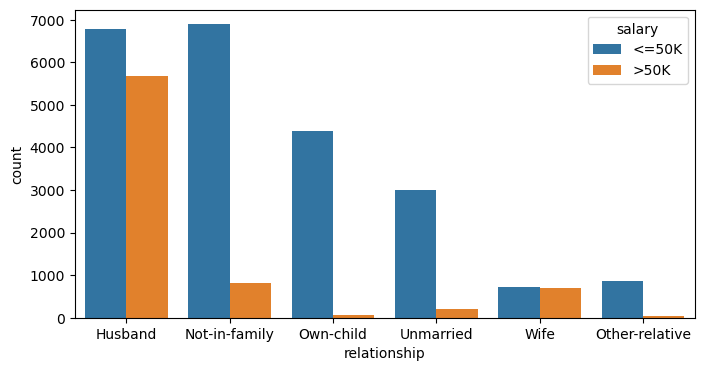

In [40]:
plt.figure(figsize=(8,4))
sns.countplot(df['relationship'], hue =df['salary'], order= (list(df['relationship'].value_counts().keys())))

<AxesSubplot:xlabel='race', ylabel='count'>

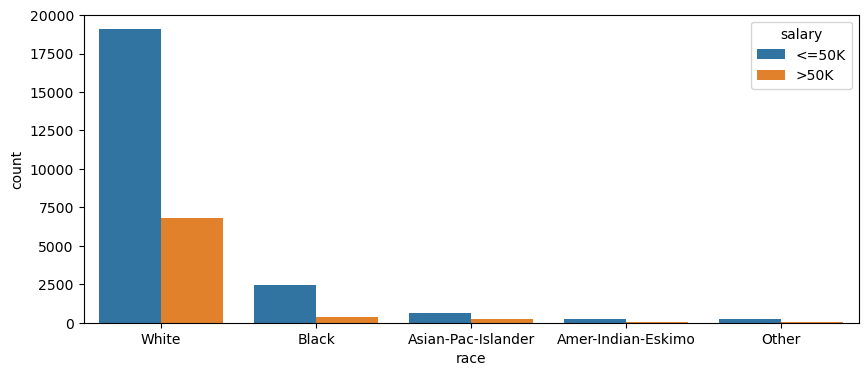

In [41]:
plt.figure(figsize=(10,4))
sns.countplot(df['race'], hue =df['salary'], order = (list(df['race'].value_counts().keys())))

In [42]:
df['race'].replace(['Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],'Other', inplace=True)

<AxesSubplot:xlabel='sex', ylabel='count'>

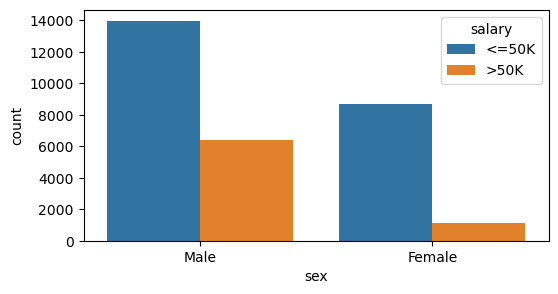

In [43]:
plt.figure(figsize=(6,3))
sns.countplot(df['sex'], hue =df['salary'], order= (list(df['sex'].value_counts().keys())))

In [44]:
group1 = df.groupby(['native-country','salary' ]).agg({'salary':['count']})

cm = sns.dark_palette("red", as_cmap=True)
group1.style.background_gradient(cmap=cm)

<AxesSubplot:>

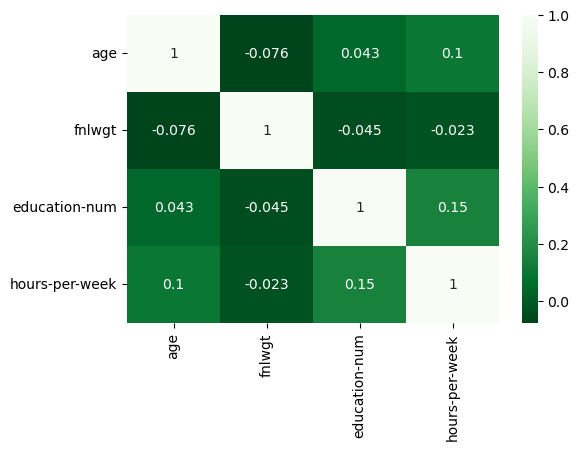

In [45]:
plt.figure(figsize = (6,4))
sns.heatmap(df.corr(), cmap = 'Greens_r', annot=True)

In [46]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,age_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,40,United-States,<=50K,30-40
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,40-50
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,30-40
3,53,Private,234721,School,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,50-60
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,20-30


In [47]:
def feature_encoder(df, col_name):
    temp_list = sorted(df[col_name].unique())
    return dict(zip(temp_list, range(len(temp_list))))
    

In [48]:
salary_encoder = feature_encoder(df,'salary')
salary_encoder

{'<=50K': 0, '>50K': 1}

In [49]:
df['salary']=df['salary'].map(salary_encoder)

In [50]:
df['salary'].value_counts()

0    22633
1     7506
Name: salary, dtype: int64

In [51]:
categorical_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'salary']

In [52]:
workclass_encoder = feature_encoder(df,'workclass')
workclass_encoder

{'Federal-gov': 0,
 'Local-gov': 1,
 'Private': 2,
 'Self-emp-inc': 3,
 'Self-emp-not-inc': 4,
 'State-gov': 5,
 'Without-pay': 6}

In [53]:
df['workclass']=df['workclass'].map(workclass_encoder)

In [54]:
education_encoder = feature_encoder(df,'education')
education_encoder

{'Assoc-acdm': 0,
 'Assoc-voc': 1,
 'Bachelors': 2,
 'Doctorate': 3,
 'HS-grad': 4,
 'Masters': 5,
 'Prof-school': 6,
 'School': 7,
 'Some-college': 8}

In [55]:
df['education']=df['education'].map(education_encoder)

In [56]:
marital_status_encoder = feature_encoder(df,'marital-status')
marital_status_encoder

{'Divorced': 0,
 'Married-AF-spouse': 1,
 'Married-civ-spouse': 2,
 'Married-spouse-absent': 3,
 'Never-married': 4,
 'Separated': 5,
 'Widowed': 6}

In [57]:
df['marital-status']=df['marital-status'].map(marital_status_encoder)

In [58]:
occupation_encoder = feature_encoder(df,'occupation')
occupation_encoder

{'Adm-clerical': 0,
 'Armed-Forces': 1,
 'Craft-repair': 2,
 'Exec-managerial': 3,
 'Farming-fishing': 4,
 'Handlers-cleaners': 5,
 'Machine-op-inspct': 6,
 'Other-service': 7,
 'Priv-house-serv': 8,
 'Prof-specialty': 9,
 'Protective-serv': 10,
 'Sales': 11,
 'Tech-support': 12,
 'Transport-moving': 13}

In [59]:
df['occupation']=df['occupation'].map(occupation_encoder)

In [60]:
relationship_encoder = feature_encoder(df,'relationship')
relationship_encoder

{'Husband': 0,
 'Not-in-family': 1,
 'Other-relative': 2,
 'Own-child': 3,
 'Unmarried': 4,
 'Wife': 5}

In [61]:
df['relationship']=df['relationship'].map(relationship_encoder)

In [62]:
race_encoder = feature_encoder(df,'race')
race_encoder

{'Black': 0, 'Other': 1, 'White': 2}

In [63]:
df['race']=df['race'].map(race_encoder)

In [64]:
sex_encoder = feature_encoder(df,'sex')
sex_encoder

{'Female': 0, 'Male': 1}

In [65]:
df['sex']=df['sex'].map(sex_encoder)

In [66]:
native_country_encoder = feature_encoder(df,'native-country')
native_country_encoder

{'Cambodia': 0,
 'Canada': 1,
 'China': 2,
 'Columbia': 3,
 'Cuba': 4,
 'Dominican-Republic': 5,
 'Ecuador': 6,
 'El-Salvador': 7,
 'England': 8,
 'France': 9,
 'Germany': 10,
 'Greece': 11,
 'Guatemala': 12,
 'Haiti': 13,
 'Holand-Netherlands': 14,
 'Honduras': 15,
 'Hong': 16,
 'Hungary': 17,
 'India': 18,
 'Iran': 19,
 'Ireland': 20,
 'Italy': 21,
 'Jamaica': 22,
 'Japan': 23,
 'Laos': 24,
 'Mexico': 25,
 'Nicaragua': 26,
 'Outlying-US(Guam-USVI-etc)': 27,
 'Peru': 28,
 'Philippines': 29,
 'Poland': 30,
 'Portugal': 31,
 'Puerto-Rico': 32,
 'Scotland': 33,
 'South': 34,
 'Taiwan': 35,
 'Thailand': 36,
 'Trinadad&Tobago': 37,
 'United-States': 38,
 'Vietnam': 39,
 'Yugoslavia': 40}

In [67]:
df['native-country']=df['native-country'].map(native_country_encoder)

In [68]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,age_group
0,39,5,77516,2,13,4,0,1,2,1,1,0,40,38,0,30-40
1,50,4,83311,2,13,2,3,0,2,1,0,0,13,38,0,40-50
2,38,2,215646,4,9,0,5,1,2,1,0,0,40,38,0,30-40
3,53,2,234721,7,7,2,5,0,0,1,0,0,40,38,0,50-60
4,28,2,338409,2,13,2,9,5,0,0,0,0,40,4,0,20-30


In [69]:
detail_info()

,data_type,duplicates,unique_val,missing_val,missing_val_%
age,int64,0,72,0,0.0
workclass,int64,0,7,0,0.0
fnlwgt,int64,0,20263,0,0.0
education,int64,0,9,0,0.0
education-num,int64,0,16,0,0.0
marital-status,int64,0,7,0,0.0
occupation,int64,0,14,0,0.0
relationship,int64,0,6,0,0.0
race,int64,0,3,0,0.0
sex,int64,0,2,0,0.0


In [70]:
df.drop(['age_group'], axis =1, inplace=True)

In [71]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,5,77516,2,13,4,0,1,2,1,1,0,40,38,0
1,50,4,83311,2,13,2,3,0,2,1,0,0,13,38,0
2,38,2,215646,4,9,0,5,1,2,1,0,0,40,38,0
3,53,2,234721,7,7,2,5,0,0,1,0,0,40,38,0
4,28,2,338409,2,13,2,9,5,0,0,0,0,40,4,0


In [72]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [73]:
# To check for Multicollinearity between independent variables 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
X.shape

(30139, 14)

In [75]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

[9.502350818009315,
 6.288891088244032,
 4.046008998676376,
 5.2224583048193365,
 18.394968744823576,
 4.077470077549584,
 3.2001392554261776,
 2.667409557221182,
 9.30406658297564,
 4.623770099138476,
 1.1025534236150671,
 1.0651070892636247,
 12.9929548602956,
 27.488813394390203]

In [76]:
vif_df = pd.DataFrame(vif, columns=['VIF'], index=X.columns)

In [77]:
vif_df.sort_values('VIF', ascending= False)

,VIF
native-country,27.488813
education-num,18.394969
hours-per-week,12.992955
age,9.502351
race,9.304067
workclass,6.288891
education,5.222458
sex,4.623770
marital-status,4.077470
fnlwgt,4.046009


In [78]:
X.drop(['native-country','education-num'], axis=1, inplace=True)
X.reset_index(drop=True)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,39,5,77516,2,4,0,1,2,1,1,0,40
1,50,4,83311,2,2,3,0,2,1,0,0,13
2,38,2,215646,4,0,5,1,2,1,0,0,40
3,53,2,234721,7,2,5,0,0,1,0,0,40
4,28,2,338409,2,2,9,5,0,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...
30134,27,2,257302,0,2,12,5,2,0,0,0,38
30135,40,2,154374,4,2,6,0,2,1,0,0,40
30136,58,2,151910,4,6,0,4,2,0,0,0,40
30137,22,2,201490,4,4,0,3,2,1,0,0,20


In [79]:
X.shape

(30139, 12)

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, random_state=42, stratify=df['salary'])

In [81]:
pd.Series(y_train).value_counts()

0    16975
1     5629
Name: salary, dtype: int64

In [82]:
pd.Series(y_test).value_counts()

0    5658
1    1877
Name: salary, dtype: int64

In [83]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week'],
      dtype='object')

In [84]:
# Lets see distribution of data 

numerical_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

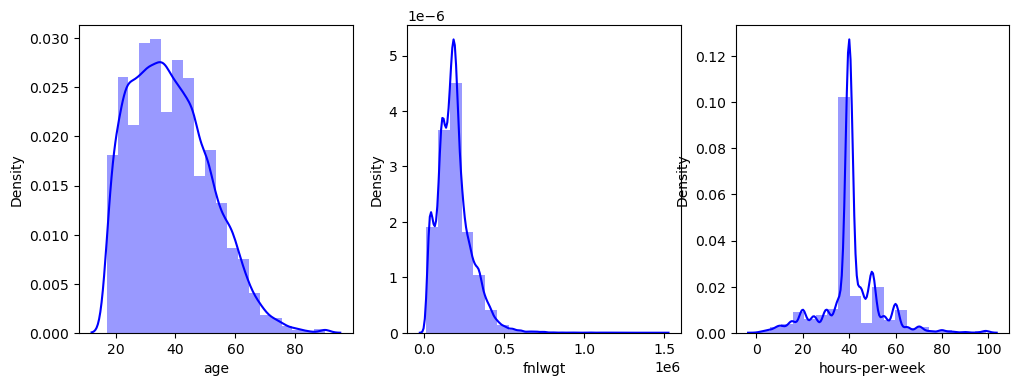

In [85]:
plt.figure(figsize=(12,4))
for enum, feature in enumerate(['age','fnlwgt','hours-per-week']):
    plt.subplot(1,3, enum+1)
    sns.distplot(df[feature], color='b', bins =20)
    plt.xlabel(feature)
    plt.show

In [86]:
X_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week'],
      dtype='object')

In [87]:
reset_cols = ['workclass', 'education','marital-status','occupation','relationship','race','sex','capital-loss','capital-gain', 
              'hours-per-week', 'age', 'fnlwgt']

X_train=X_train.reindex(reset_cols, axis =1)
X_test=X_test.reindex(reset_cols, axis =1)

In [88]:
X_train.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-loss', 'capital-gain',
       'hours-per-week', 'age', 'fnlwgt'],
      dtype='object')

In [89]:
# Robust Scaler

from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()

In [90]:
X_train.iloc[:,9:]

,hours-per-week,age,fnlwgt
10026,40,27,72887
7391,37,42,31251
31046,80,50,143730
19076,40,62,39630
16323,40,59,130532
...,...,...,...
21739,35,59,244554
9301,24,19,250639
28315,40,39,365739
27799,60,32,114746


In [91]:
X_train.iloc[:,9:] = robustscaler.fit_transform(X_train.iloc[:,9:])
X_train

,workclass,education,marital-status,occupation,relationship,race,sex,capital-loss,capital-gain,hours-per-week,age,fnlwgt
10026,2,4,4,5,2,1,1,0,0,0.0,-0.526316,-0.876326
7391,2,1,2,11,0,2,1,0,0,-0.6,0.263158,-1.222578
31046,4,2,2,4,0,2,1,0,0,8.0,0.684211,-0.287186
19076,5,2,2,9,0,2,1,0,0,0.0,1.315789,-1.152897
16323,1,8,6,7,1,2,0,0,0,0.0,1.157895,-0.396942
...,...,...,...,...,...,...,...,...,...,...,...,...
21739,2,7,0,7,1,0,0,0,0,-1.0,1.157895,0.551282
9301,2,8,4,7,3,2,1,0,0,-3.2,-0.947368,0.601885
28315,2,4,2,2,0,2,1,0,0,0.0,0.105263,1.559074
27799,2,4,5,5,4,1,0,0,0,4.0,-0.263158,-0.528221


In [92]:
X_test.iloc[:,9:] = robustscaler.transform(X_test.iloc[:,9:])
X_test

,workclass,education,marital-status,occupation,relationship,race,sex,capital-loss,capital-gain,hours-per-week,age,fnlwgt
13996,2,4,2,11,0,2,1,0,0,1.0,-0.368421,0.044545
4356,0,8,0,3,4,2,1,0,0,0.0,0.684211,-1.179018
23582,2,1,2,3,0,2,1,0,0,2.0,-0.368421,1.102933
11419,5,2,2,9,0,2,1,0,0,1.0,0.105263,-0.464960
31681,2,4,2,2,0,2,1,2,0,11.8,0.315789,0.732324
...,...,...,...,...,...,...,...,...,...,...,...,...
28318,4,5,2,9,0,0,1,0,4,4.0,0.052632,0.135308
23999,3,2,2,3,0,2,1,0,4,1.0,0.368421,-0.482224
17267,2,4,2,2,0,2,1,0,0,-3.0,-1.000000,0.283635
29617,4,4,2,4,0,2,1,0,0,2.0,-0.526316,-0.939355


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score

In [94]:
metrics = pd.DataFrame(index=['Train_accuracy', 'Test_accuracy','CV_score',
                              'precision', 'recall', 'f1_Score'],
                       columns=['LogisticReg', 'KNeighbors', 'SVClassifier',
                                'DecisionTree', 'RandomForest'])
metrics

,LogisticReg,KNeighbors,SVClassifier,DecisionTree,RandomForest
Train_accuracy,NaN,NaN,NaN,NaN,NaN
Test_accuracy,NaN,NaN,NaN,NaN,NaN
CV_score,NaN,NaN,NaN,NaN,NaN
precision,NaN,NaN,NaN,NaN,NaN
recall,NaN,NaN,NaN,NaN,NaN
f1_Score,NaN,NaN,NaN,NaN,NaN


In [95]:
models = []

models.append(('LogisticReg',LogisticRegression()))
models.append(('KNeighbors',KNeighborsClassifier()))
models.append(('SVClassifier',SVC()))
models.append(('DecisionTree',DecisionTreeClassifier()))
models.append(('RandomForest',RandomForestClassifier()))

models

[('LogisticReg', LogisticRegression()),
 ('KNeighbors', KNeighborsClassifier()),
 ('SVClassifier', SVC()),
 ('DecisionTree', DecisionTreeClassifier()),
 ('RandomForest', RandomForestClassifier())]

In [96]:
def evalutate_model(model_list):
    
    for name, model in models:
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_score = accuracy_score(y_train, y_train_pred)
        metrics.loc['Train_accuracy', name] = round(train_score*100,2)

        test_score = accuracy_score(y_test, y_test_pred)
        metrics.loc['Test_accuracy', name] = round(test_score*100,2)

        cv_result = cross_val_score(model, X_train, y_train, cv = 3, scoring ='accuracy')
        print(f"{name:{13}} {cv_result} {cv_result.mean():{18}} {cv_result.std():{18}}")
        metrics.loc['CV_score', name] = round(cv_result.mean()*100,2)

        precision = precision_score(y_test, y_test_pred)
        metrics.loc['precision', name] = round(precision*100,2)

        recall = recall_score(y_test, y_test_pred)
        metrics.loc['recall', name] = round(recall*100,2)

        f1_Score = f1_score(y_test, y_test_pred)
        metrics.loc['f1_Score', name] = round(f1_Score*100,2)

    return metrics
    

In [97]:
evalutate_model(model_list = "models")

LogisticReg   [0.78566689 0.78540146 0.78869127]  0.786586537990102 0.001492207273926472
KNeighbors    [0.8151294  0.81751825 0.81537032] 0.8160059885123297 0.0010738430012370752
SVClassifier  [0.81088255 0.8084937  0.80727369]  0.808883312262446 0.0014988462466887576
DecisionTree  [0.78181818 0.78500332 0.77687815] 0.7812332173480371 0.0033427749020862652
RandomForest  [0.83052422 0.83676178 0.83169631] 0.8329941029113055 0.0027067794340623797


,LogisticReg,KNeighbors,SVClassifier,DecisionTree,RandomForest
Train_accuracy,78.65,87.06,81.45,100.0,100.0
Test_accuracy,78.7,82.14,81.34,78.1,83.49
CV_score,78.66,81.6,80.89,78.12,83.3
precision,64.72,66.34,70.42,55.9,70.12
recall,31.86,57.43,43.26,57.27,58.76
f1_Score,42.7,61.56,53.6,56.58,63.94


In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
# Random Forest

param_grid = {'criterion' : ['gini', 'entropy'],
        'n_estimators' : [10,100,200],
        'max_depth' : [5,6,7,8,9,10],
        'min_samples_leaf': [2,3,4,5],
        'min_samples_split': [2,3,4],
        'oob_score' : [True,False],
        'n_jobs': [-1],
        'random_state': [42]
        }
rf_model = GridSearchCV(RandomForestClassifier(), param_grid, scoring='accuracy')
rf_model.fit(X_train,y_train)
rf_model.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 42}

In [100]:
best_params = rf_model.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 42}

In [101]:
'''
{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 42}
 
 '''

"\n{'criterion': 'gini',\n 'max_depth': 6,\n 'max_features': 5,\n 'max_leaf_nodes': 10,\n 'n_estimators': 20,\n 'n_jobs': -1,\n 'oob_score': True}\n \n "

In [102]:
rf_model = RandomForestClassifier(**best_params)
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.835965494359655

In [106]:
import pickle

os.makedirs('census', exist_ok=True)

pickle.dump(salary_encoder, open(os.path.join(os.getcwd(), 'census', 'output_encoder.pkl'),'wb'))
pickle.dump(workclass_encoder, open(os.path.join(os.getcwd(), 'census', 'workclass_encoder.pkl'),'wb'))
pickle.dump(marital_status_encoder, open(os.path.join(os.getcwd(), 'census', 'marital_status_encoder.pkl'),'wb'))
pickle.dump(occupation_encoder, open(os.path.join(os.getcwd(), 'census', 'occupation_encoder.pkl'),'wb'))
pickle.dump(relationship_encoder, open(os.path.join(os.getcwd(), 'census', 'relationship_encoder.pkl'),'wb'))
pickle.dump(race_encoder, open(os.path.join(os.getcwd(), 'census', 'race_encoder.pkl'),'wb'))
pickle.dump(sex_encoder, open(os.path.join(os.getcwd(), 'census', 'sex_encoder.pkl'),'wb'))
pickle.dump(robustscaler, open(os.path.join(os.getcwd(), 'census', 'scaler.pkl'),'wb'))
pickle.dump(rf_model, open(os.path.join(os.getcwd(), 'census', 'model.pkl'),'wb'))